# Symbolic derivation qubit-cavity Hamiltonian

<style>
p {
    font-family: "Liberation Serif", serif;
    font-size: 12pt;
}
</style>


Based on: J. R. Johansson (robert@riken.jp), [http://jrjohansson.github.io](http://jrjohansson.github.io), and Eunjong Kim.

## Setup modules

In [1]:
from sympy import *
init_printing()

In [2]:
from sympsi import *
from sympsi.boson import *
from sympsi.pauli import *

## The Jaynes-Cummings model

The [Jaynes-Cummings model](http://en.wikipedia.org/wiki/Jaynes%E2%80%93Cummings_model) is one of the most elementary quantum mechanical models light-matter interaction. It describes a single two-level atom that interacts with a single harmonic-oscillator mode of a electromagnetic cavity.

The Hamiltonian for a two-level system in its eigenbasis can be written as

$$
H = \frac{1}{2}\omega_q \sigma_z
$$

and the Hamiltonian of a quantum harmonic oscillator (cavity or nanomechanical resonator, NR) is

$$
H = \hbar\omega_r (a^\dagger a + 1/2)
$$

$$
H = \hbar\omega_{NR} (b^\dagger b + 1/2)
$$

The atom interacts with the electromagnetic field produced by the cavity (NR) mode $a + a^\dagger$ ($b + b^\dagger$) through its dipole moment. The dipole-transition operators is $\sigma_x$ (which cause a transition from the two dipole states of the atom). The combined atom-cavity Hamiltonian can therefore be written in the form

$$
H = 
\hbar \omega_r (a^\dagger a + 1/2)
+
\hbar \omega_{NR} (b^\dagger b + 1/2)
+ \frac{1}{2}\hbar\Omega\sigma_z 
+
\hbar
\sigma_x \left( g(a + a^\dagger)
+
\lambda(b + b^\dagger)\right)
$$




Although the Jaynes-Cumming Hamiltonian allow us to evolve the given initial state according to the Schrödinger Equation, in an experiment we would like to predicte the response of the coupled cavity-NR-qubit system under the influence of driving fields for the cavity and qubit, and also account for the effects of dissipation and dephasing (not treated here)

The external coherent-state input may be incorporated in the Jaynes-Cummings Hamiltonian by addition of terms involving the amplitude of the driving field $\vec{E_d} \left(\vec{E_s}\right)$ and it's frequency $\omega_d\left(\omega_s\right)$

$$
H_{cavity} = 
E_d \left(e^{i\omega_dt}a +e^{-i\omega_dt}a^\dagger\right)
$$

$$
H_{qubit} = 
E_s \left(e^{i\omega_st}\sigma_- +e^{-i\omega_st}\sigma_+\right)
$$

$$
H_{NR} = 
E_p \left(e^{i\omega_st}b +e^{-i\omega_st}b^\dagger\right)
$$

To obtain the Jaynes-Cumming Hamiltonian 

$$
?
H = 
\hbar\omega_r (a^\dagger a + 1/2)
%-\frac{1}{2}\Delta\sigma_x 
+ \frac{1}{2}\hbar\Omega\sigma_z 
+
\hbar
\sigma_x \left( g(a + a^\dagger)
+
\lambda(b + b^\dagger)\right)
$$

we also need to perform a rotating-wave approximation which simplifies the interaction part of the Hamiltonian. In the following we will begin with looking at how these two Hamiltonians are related.

To represent the atom-cavity Hamiltonian in SymPy we creates an instances of the operator classes `BosonOp` and `SigmaX`, `SigmaY`, and `SigmaZ`, and use these to construct the Hamiltonian (we work in units where $\hbar = 1$).

In [3]:
# CPW, qubit and NR energies
omega_r, omega_q, omega_nr = symbols("omega_r, omega_q, omega_{NR}") 
# Coupling CPW-qubit, NR_qubit
g, L, chi, eps = symbols("g, lambda, chi, epsilon")
# Detuning 

# Drives and detunnings

Delta_d, Delta_s, Delta_p  = symbols(" Delta_d, Delta_s, Delta_p ")

A, B, C = symbols("A,B,C") # Electric field amplitude

omega_d, omega_s, omega_p = symbols("omega_d, omega_s, omega_p") # drive frequencies

# Detunning CPW-qubit, NR-qubit

Delta_CPW, Delta_NR = symbols("Delta_{CPW},Delta_{NR}")

# auxilary variables

y, x, t, Hsym = symbols("x, y, t, H ") 

Delta_SP, Delta_SD = symbols("Delta_{SP},Delta_{SD}")

In [4]:
# omega_r, omega_q, g, Delta_d, Delta_s, t, x, chi, Hsym = symbols("omega_r, omega_q, g, Delta_d, Delta_s, t, x, chi, H")

# A, B, C = symbols("A,B,C") # Electric field amplitude

# omega_d, omega_s = symbols("omega_d, omega_s") # 

# omega_nr, L = symbols("omega_{NR},lambda")

# Delta,Delta_t = symbols("Delta,Delta_t")

# y, omega_t = symbols("y, omega_t")

In [5]:

sx, sy, sz, sm, sp = SigmaX(), SigmaY(), SigmaZ(), SigmaMinus(), SigmaPlus()
a = BosonOp("a")
b = BosonOp("b")

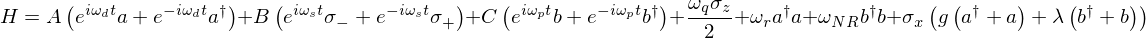

In [7]:
H = omega_r * Dagger(a) * a + omega_q/2 * sz + omega_nr * Dagger(b) * b 

H_int = sx * (g  * (a + Dagger(a)) + L * (b + Dagger(b)))

H_drive_r = A * (exp(I*omega_d*t)*a + exp(-I*omega_d*t)*Dagger(a))
H_drive_q = B * (exp(I*omega_s*t)*sm + exp(-I*omega_s*t)*sp)
H_drive_NR = C * (exp(I*omega_p*t)*b + exp(-I*omega_p*t)*Dagger(b))
H_total =  H+  H_int + H_drive_r + H_drive_q + H_drive_NR
Eq(Hsym,H_total)


##Unitary transformation to interaction picture

### CPW (a)

In [7]:
U = exp(I  * omega_r * t * Dagger(a)*a)
# U

In [8]:
H1 = hamiltonian_transformation(U, H_total.expand(), independent=True)

# H1

### Nanoresonator - b


In [9]:
U = exp(I  * omega_nr * t * Dagger(b)*b)
# U

In [10]:
H1a = hamiltonian_transformation(U, H1.expand(), independent=True)

# H1a

###Qubit - Sigma_z


In [11]:
U = exp(I * omega_q * t * sp * sm)

# U

In [12]:
H2 = hamiltonian_transformation(U, H1a.expand())

H2 = H2.subs(sx, sm + sp).expand()

H2 = powsimp(H2)

# H2

In [13]:
# H2

In [14]:
# trick to simplify exponents
def simplify_exp(e):
    if isinstance(e, exp):
        return exp(simplify(e.exp.expand()))

    if isinstance(e, (Add, Mul)):
        return type(e)(*(simplify_exp(arg) for arg in e.args)) 

    return e

In [15]:
 
    H3 = simplify_exp(H3a).subs(-omega_nr + omega_q, Delta_NR)



# H3

Now, in the rotating-wave approximation we can drop the fast oscillating terms containing the factors
$e^{\pm i(\omega_q + \omega_r)t} $ and $e^{\pm i(\omega_q + \omega_{NR})t}  $

In [16]:
H4 = drop_terms_containing(H3, [exp( I * (omega_q + omega_r) * t),
                                exp(-I * (omega_q + omega_r) * t),
                                exp(I * (omega_q + omega_nr) * t),
                                exp(-I * (omega_q + omega_nr) * t)],
                          )

H4 = drop_c_number_terms(H4.expand())

Eq(Hsym, H4)

This is the interaction term of in the Jaynes-Cumming model in the interaction picture. If we transform back to the Schrödinger picture we have:

In [17]:
U = exp(-I * omega_r * t * Dagger(a) * a)
H5 = hamiltonian_transformation(U, H4.expand(), independent=True)
# H5

In [18]:
U = exp(-I * omega_nr * t * Dagger(b) * b)
H5a = hamiltonian_transformation(U, H5.expand(), independent=True)
# H5a

In [19]:
U = exp(-I * omega_q * t * sp * sm)
H6 = hamiltonian_transformation(U, H5a.expand())
# H6

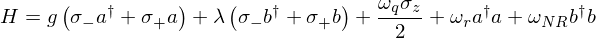

In [20]:
H7a = simplify_exp(H6).subs(Delta_CPW, omega_q - omega_r)
H7 = simplify_exp(H7a).subs(Delta_NR, omega_q - omega_nr)


H7 = simplify_exp(powsimp(H7)).expand()

H7 = drop_c_number_terms(H7)

H = collect(H7, [A,B, C,g,L])

Eq(Hsym, H)

## Linearized interaction

First we apply the unitary transformation $U = e^{i \omega_d a^\dagger a t}$:

In [21]:
U = exp(I * Dagger(a) * a * omega_d * t)

# U

In [22]:
H1 = hamiltonian_transformation(U, H, independent=True)

# H1

We can now perform a rotating-wave approximation (RWA) by eliminating all terms that rotate with frequencies $2\omega_d$:

In [23]:
H2 = drop_terms_containing(H1.expand(), [exp(-2*I*omega_d*t), exp(2*I*omega_d*t)])
H2 = H2.collect([A,B,Dagger(a)*a,g])
# H2
# Eq(Symbol("H_{rwa}"), H2)

Introduce the detuning $\Delta_d = \omega_r - \omega_d$:

In [24]:
H3 = H2.subs(-omega_d+omega_r, Delta_d).expand()

H3 = H3.collect([A,B,C,Dagger(a)*a,Dagger(b)*b,g,L])
# H3

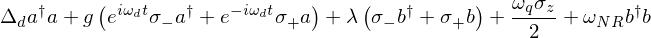

In [25]:
H3

Second we apply the unitary transformation $U = e^{i \omega_p b^\dagger b t}$:

In [26]:
U = exp(I * Dagger(b) * b * omega_p * t)

In [27]:
H3a = hamiltonian_transformation(U, H3, independent=True)

In [28]:
H3b = drop_terms_containing(H3a.expand(), [exp(-2*I*omega_p*t), exp(2*I*omega_p*t)])
H3b = H3b.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g])

In [29]:
H3c = H3b.subs(-omega_p+omega_nr, Delta_p).expand()

H3c = H3c.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g])

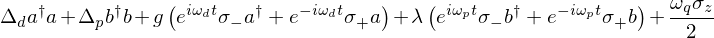

In [30]:
H3c

Substiture $\sigma_z = 2\sigma_+\sigma_-$

In [31]:
H3 = H3c.subs(sz,2*sp*sm).expand()
# H3

In [32]:
H3 = H3.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g])
# H3

In [33]:
# H3

Second we apply the unitary transformation $U = e^{i \omega_s \sigma_+ \sigma_- t}$:

In [34]:
U = exp(I * sp*sm* omega_s * t)

# U

In [35]:
H4 = hamiltonian_transformation(U, H3, independent=True)

H4 =H4.expand()
H4

Substitute $ \sigma_+\sigma_-=\dfrac{\sigma_z}{2}$

In [36]:
H4 = H4.subs(omega_q*sp*sm,omega_q*sz/2)
# H4

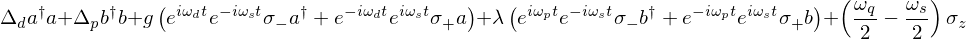

In [37]:
H4 = H4.subs(-omega_s*sp*sm,-omega_s*sz/2)

# H4 = H4.subs(-omega_s*sp*sm,-omega_s*sz/2)


H4= H4.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g,sz])
H4

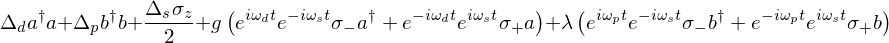

In [38]:
H4 = H4.subs(omega_q/2 - omega_s/2,Delta_s/2).expand()

H4= H4.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g])
H4

Introduce the detuning $\Delta_{SP} = \omega_S - \omega_D$ and $\Delta_{SD} = \omega_S - \omega_D$:

In [39]:
H4 = simplify_exp(powsimp(H4))
H4 = H4.subs(omega_p - omega_s,-Delta_SP).expand()
H4 = simplify_exp(powsimp(H4))
H4 = H4.subs(omega_d - omega_s,-Delta_SD).expand()



H5 = H4.collect([A,B,C,L,Dagger(a)*a,Dagger(b)*b,g])
# H5

In [40]:
H5 = H5.expand()
# H5

In [41]:
H6 = simplify_exp(powsimp(H5))
# H6 = simplify_exp(H6).subs(omega_t - omega_s, Delta_t)

H = H6.collect([A,B,C,Dagger(a)*a,g,sz,L])

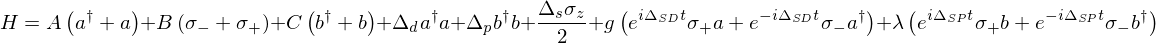

In [42]:
Eq(Hsym, H)

This is the Jaynes-Cumming model give above, and we have now seen that it is obtained to the dipole interaction Hamiltonian through the rotating wave approximation.

## Dispersive regime

In the dispersive regime, where the two-level system is detuned from the cavity by much more than the interaction strength, $\Delta \gg g, \lambda$, an effective Hamiltonian can be dervied which describes the Stark shift of the two-level system (which depends on the number of photons in the cavity) and the frequency shift of the cavity (which depend on the state of the two-level system).

This effective Hamiltonian, which is correct up to second order in the small paramter $g/\Delta$, is obtained by performing the unitary transformation

$$
U = e^{\frac{g}{\Delta}(a \sigma_- - a^\dagger \sigma_+)}
$$

$$
U = e^{\frac{\lambda}{\Delta}(b \sigma_- - b^\dagger \sigma_+)}
$$

In [21]:
U = exp(x * (a * sp).expand())

# U

In [22]:
#H1 = unitary_transformation(U, H, allinone=True, expansion_search=False, N=3).expand()
#H1 = qsimplify(H1)
#H1

In [23]:
H1 = hamiltonian_transformation(U, H, expansion_search=False, N=3).expand()

H1a = qsimplify(H1)

# H1a

In [24]:
U = exp(y * (b * sp).expand())

# U

In [25]:
H1a = hamiltonian_transformation(U, H1a, expansion_search=False, N=3).expand()

H1 = qsimplify(H1a)

# H1

In [26]:
U = exp(-x * (Dagger(a) * sm).expand())

# U

In [27]:
H2a = hamiltonian_transformation(U, H1, expansion_search=False, N=3).expand()

H2a = qsimplify(H2a)

# H2a

In [28]:
U = exp(-y * (Dagger(b) * sm).expand())

# U

In [29]:
H2 = hamiltonian_transformation(U, H2a, expansion_search=False, N=3).expand()

H2 = qsimplify(H2)

In [30]:
# H2

In [31]:
# H3 = drop_terms_containing(H2.expand(), [x**2,x**3, x**4,x**5,x**6,x**7, y**2,y**3, y**4,y**5,y**6,y**7])
H3 = drop_terms_containing(H2.expand(), [x**3, x**4,x**5,x**6,x**7, y**3, y**4,y**5,y**6,y**7])


# H3

In [32]:
H4 = H3.subs(x, g/Delta_CPW)
H4a = H4.subs(y, L/Delta_NR)
# H4

In [33]:
H4b = qsimplify(H4a)

In [34]:
H5 = drop_c_number_terms(H4b)
# H6a = drop_terms_containing(H5.expand(), [exp(I*Delta_SP*t), exp(-I*Delta_SP*t)])
# H6 = drop_terms_containing(H6a.expand(), [exp(I*Delta_SD*t), exp(-I*Delta_SD*t)])


# H6

In [35]:
H6 = collect(H5, [A,B,C,Dagger(a)*a,Dagger(b)*b,sz,g,L])
# H6 

In [ ]:

U = exp(I * omega_r * t * Dagger(a) * a)
H7 = hamiltonian_transformation(U, H6.expand()).expand()

H7a = qsimplify(H7)




In [ ]:
U = exp(I * omega_nr * t * Dagger(b) * b)
H7b = hamiltonian_transformation(U, H7a).expand()

H7b = qsimplify(H7b)

In [ ]:
U = exp(I * omega_q * t * sp * sm)
H7c = hamiltonian_transformation(U, H7b, expansion_search=False, N=3).expand()

H7c = qsimplify(H7c)

In [ ]:
H8 = drop_terms_containing(H7, [exp(I * omega_r * t), exp(-I * omega_r * t),
                                exp(I * omega_nr * t), exp(-I * omega_nr * t),
                                exp(I * omega_q * t), exp(-I * omega_q * t)])


In [ ]:
U = exp(- I * omega_r * t * Dagger(a) * a)
H9 = hamiltonian_transformation(U, H8.expand(), expansion_search=False, N=3).expand()

H9 = qsimplify(H9)

In [ ]:
U = exp(-I * omega_nr * t * Dagger(b) * b)
H10 = hamiltonian_transformation(U, H9, expansion_search=False, N=3).expand()

H10 = qsimplify(H10)

In [ ]:
U = exp(-I * omega_q * t * sp * sm)
H11 = hamiltonian_transformation(U, H10, expansion_search=False, N=3).expand()

H11 = qsimplify(H11)

In [65]:
# H8 = qsimplify(H7.expand())
# H9 = collect(H8, [A,B,C,Dagger(a)*a,g,sz,L])
# # H9

In [ ]:
# H10 = qsimplify(H9)

H12 = collect(H11, [A,B,C,Dagger(a)*a,g,sz,L])

# H10

This is the Hamiltonian of the Jaynes-Cummings model in the the dispersive regime. It can be interpreted as the resonator having a qubit-state-dependent frequency shift, or alternatively that the qubit is feeling a resonator-photon-number dependent Stark-shift.

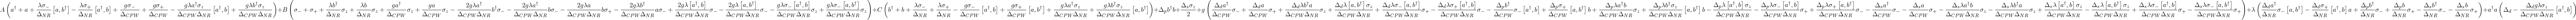

In [67]:
H12